# BBM 409 - Programming Assignment 2

**Erdinç Arıcı - 2210356035**

## 1. LOGISTIC REGRESSION TASK

#### Data loading and exploration

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/erdnc/Desktop/portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")
df['y'] = df['y'].replace({2: 1, 1: 0})

#### Calculate correlation between target variable 'y' and other features

In [3]:
correlation = df.corr()['y'].sort_values(ascending=False)
print(correlation)

y              1.000000
duration       0.443087
poutcome       0.291850
contact        0.219086
pdays          0.153807
balance        0.088308
previous       0.087656
education      0.082672
age            0.040038
month          0.031213
job            0.022716
default       -0.035414
day_of_week   -0.042603
marital       -0.062501
loan          -0.118816
campaign      -0.133147
housing       -0.213409
Name: y, dtype: float64


### 1.1 Implementing Logistic Regression with most correlated 2 features

####  Choose the two most correlated features with target feature 'y'

In [4]:
X_most = df[['duration', 'poutcome']].to_numpy()
y_most = df['y'].to_numpy()

#### Define your logistic regression model as class without using any built-in libraries

In [5]:
class LogisticRegressionModel:
    def __init__(self, learning_rate = 0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        samples, features = X.shape
        self.w = np.zeros(features)
        self.bias = 0

        for _ in range(self.iterations):
            predictions = self.sigmoid(np.dot(X, self.w) + self.bias)
            
            self.w -= self.learning_rate * (1 / samples) * np.dot(X.T, (predictions - y))
            self.bias -= self.learning_rate * (1 / samples) * np.sum(predictions - y)

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.w) + self.bias)
        predictions_class = [1 if i > 0.5 else 0 for i in predictions]
        return np.array(predictions_class)

#### Split the dataset into a training set and a validation set (80% training and 20% validation)

In [6]:
X_train_most, X_test_most, y_train_most, y_test_most = train_test_split(X_most, y_most, test_size = 0.2, random_state = 47)

#### Scale the features using StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train_most = scaler.fit_transform(X_train_most)
X_test_most = scaler.transform(X_test_most)

#### Initialize and train the custom logistic regression model

In [9]:
model_lr1 = LogisticRegressionModel()

model_lr1.fit(X_train_most, y_train_most)

#### Make predictions on the validation set

In [10]:
predictions_lr1 = model_lr1.predict(X_test_most)

#### Evaluate the model's performance, print classification report and confusion matrix

In [11]:
print(f"Model's Performance: {accuracy_score(y_test_most, predictions_lr1) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_most, predictions_lr1))

print("Confusion Matrix:\n", confusion_matrix(y_test_most, predictions_lr1))

Model's Performance: 76.84%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79      1063
           1       0.81      0.69      0.75      1053

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116

Confusion Matrix:
 [[895 168]
 [322 731]]


#### Print decision boundaries as in PA1

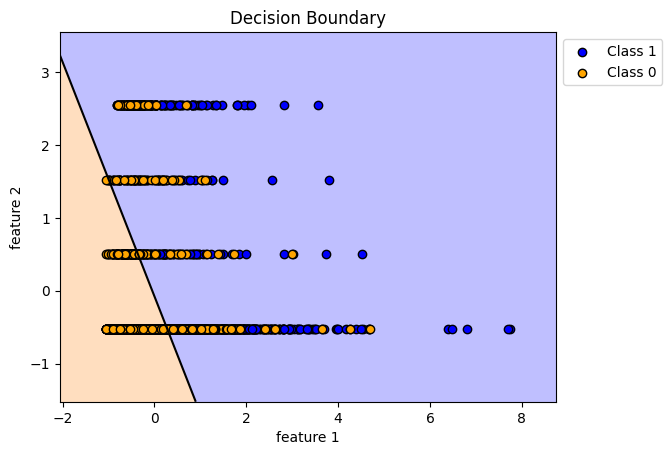

In [12]:
def plot_decision_boundary(model, X, y, svm = False):
    T = y.flatten()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

    if(not svm):
        line = np.dot(np.c_[x_grid.ravel(), y_grid.ravel()], model.w) + model.bias
        line = line.reshape(x_grid.shape)
        plt.contourf(x_grid, y_grid, line, levels = [-np.inf, 0, np.inf], colors = ['#FF7F00', '#0000FF'], alpha = 0.25)
        plt.contour(x_grid, y_grid, line, levels = [0], colors='black')
        
    else:
        line = np.c_[x_grid.ravel(), y_grid.ravel()]
        line = model.decision_function(line).reshape(x_grid.shape)
        plt.contourf(x_grid, y_grid, line, levels = [-np.inf, 0, np.inf], colors = ['#FF7F00', '#0000FF'], alpha = 0.25)
        plt.contour(x_grid, y_grid, line, levels = [-1, 0, 1], colors='black', linestyles = ['--', '-', '--'], linewidths = 1.5)
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 50, edgecolor = 'yellow', facecolor = 'none', label = 'Support Vectors')
        
    plt.scatter(X[T == 1][:, 0], X[T == 1][:, 1], color = 'blue', edgecolor = 'black', label = 'Class 1')
    plt.scatter(X[T == 0][:, 0], X[T == 0][:, 1], color = 'orange', edgecolor = 'black', label = 'Class 0')

    plt.ylim(y_min, y_max)
    plt.xlim(x_min, x_max)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
    plt.title('Decision Boundary' + (' with Margins' if svm else ''))
    plt.show()
    
plot_decision_boundary(model_lr1, X_test_most, y_test_most)

### 1.2 Implementing Logistic Regression using all features.

#### Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [13]:
X_all = df.iloc[:, :-1].to_numpy()
y_all = df['y'].to_numpy()

#### Split the dataset into a training set and a validation set (80% training and 20% validation).

In [14]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.2, random_state = 47)

#### Scale the features using StandardScaler

In [15]:
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

#### Initialize and train the custom logistic regression model.

In [16]:
model_lr2 = LogisticRegressionModel()

model_lr2.fit(X_train_all, y_train_all)

#### Make predictions on the validation set

In [17]:
predictions_lr2 = model_lr2.predict(X_test_all)

#### Evaluate the model's performance, print classification report and confusion matrix

In [18]:
print(f"Model's Performance: {accuracy_score(y_test_all, predictions_lr2) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_all, predictions_lr2))

print("Confusion Matrix:\n", confusion_matrix(y_test_all, predictions_lr2))

Model's Performance: 79.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1063
           1       0.81      0.77      0.79      1053

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116

Confusion Matrix:
 [[875 188]
 [240 813]]


#### Briefly explain the impact of the number of features on the learning ability of the model

The number of features in a dataset plays a significant role in determining a model's learning performance. If the dataset contains too few features, the model may lack sufficient information to learn the underlying patterns and relationships. This situation is referred to as underfitting and leads to poor performance on both the training data and unseen data. A lack of features can cause the model to overlook critical relationships between important variables.

On the other hand, having too many features can cause the model to learn irrelevant or unrelated details, leading to overfitting. In this case, the model performs well on the training data but struggles with new data. The model may capture noise or meaningless details in the dataset, making it difficult to generalize effectively.

In conclusion, balancing the number of features is crucial for the success of a model. Therefore, applying proper feature selection and regularization techniques is essential to optimize the model's performance. A good model is trained on a dataset that provides sufficient information while avoiding unnecessary complexity, resulting in better overall performance.

#### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table

| **Metric**              | **SVM (Best Model)** | **Logistic Regression (Best Model)** |
|-------------------------|----------------------|--------------------------------------|
| **Accuracy**            | 83.32%               | 79.77%                               |
| **Precision (Class 0)** | 0.86                 | 0.80                                 |
| **Precision (Class 1)** | 0.81                 | 0.81                                 |
| **Recall (Class 0)**    | 0.80                 | 0.82                                 |
| **Recall (Class 1)**    | 0.87                 | 0.77                                 |
| **F1-Score (Class 0)**  | 0.83                 | 0.80                                 |
| **F1-Score (Class 1)**  | 0.84                 | 0.79                                 |

The comparison between the SVM and Logistic Regression models highlights that SVM outperforms Logistic Regression in terms of overall accuracy, achieving 83.32% compared to Logistic Regression's 79.77%. SVM also provides better-balanced performance across both classes, particularly excelling in recall and F1-scores for positive samples (Class 1). While Logistic Regression slightly surpasses SVM in recall for negative samples (Class 0), SVM's higher precision and overall robustness make it a more reliable model for this dataset. 

## 2. Support Vector Machine Task

### 2.1 implementing svm with grid search cv using all features

#### Define features and target variable, you will use all features of dataset in this task

#### Split the dataset into a training set and a validation set (80% training and 20% validation)

#### Scale the features using StandardScaler

In [19]:
#X_all and y_all

#### Implement GridSearchCV

In [20]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3]
}
svm = SVC()
gscv = GridSearchCV(estimator = svm, param_grid = param_grid, scoring = 'accuracy', cv = 5, verbose = 1)
gscv.fit(X_train_all, y_train_all)

print("Best parameters:", gscv.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


#### Initialize the SVM classifier

In [21]:
model_svm1 = SVC(kernel = 'rbf', C = 1, gamma = 'auto', degree = 1)

#### Train the SVM classifier with the best parameters found from grid search

In [22]:
model_svm1.fit(X_train_all, y_train_all)

SVC(C=1, degree=1, gamma='auto')

#### Make predictions on the validation set using the best model

In [23]:
predictions_svm1 = model_svm1.predict(X_test_all)

#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV

In [24]:
print(f"Model's Performance: {accuracy_score(y_test_all, predictions_svm1) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_all, predictions_svm1))

print("Confusion Matrix:\n", confusion_matrix(y_test_all, predictions_svm1))

Model's Performance: 83.32%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1063
           1       0.81      0.87      0.84      1053

    accuracy                           0.83      2116
   macro avg       0.83      0.83      0.83      2116
weighted avg       0.83      0.83      0.83      2116

Confusion Matrix:
 [[851 212]
 [141 912]]


### 2.2 implementing svm with most correlated 2 features

#### Choose the two most correlated features with target feature 'y'

#### Split the dataset into a training set and a validation set (80% training and 20% validation).

#### Scale the features using StandardScaler

In [25]:
#X_most and y_most

#### Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [26]:
model_svm2 = SVC(kernel = 'rbf', C = 1)

#### Train the SVM classifier

In [27]:
model_svm2.fit(X_train_most, y_train_most)

SVC(C=1)

#### Make predictions on the validation set

In [28]:
predictions_svm2 = model_svm2.predict(X_test_most)

#### Evaluate the model's performance, print classification report and confusion matrix

In [29]:
print(f"Model's Performance: {accuracy_score(y_test_most, predictions_svm2) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_most, predictions_svm2))

print("Confusion Matrix:\n", confusion_matrix(y_test_most, predictions_svm2))

Model's Performance: 78.73%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      1063
           1       0.81      0.75      0.78      1053

    accuracy                           0.79      2116
   macro avg       0.79      0.79      0.79      2116
weighted avg       0.79      0.79      0.79      2116

Confusion Matrix:
 [[871 192]
 [258 795]]


#### Visualize decision boundary and support vectors

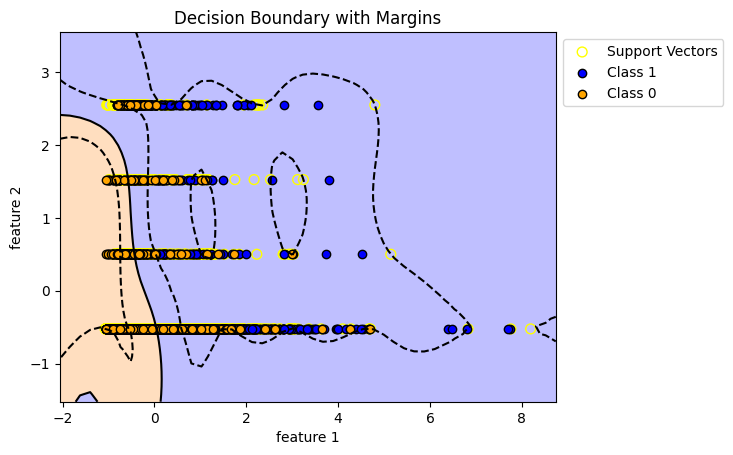

In [30]:
plot_decision_boundary(model_svm2, X_test_most, y_test_most, True)

### 2.3 implementing svm with least correlated 2 features

#### Choose the two least correlated features with target feature 'y'

In [31]:
X_least = df[['campaign', 'housing']].to_numpy()
y_least = df['y'].to_numpy()

#### Split the dataset into a training set and a validation set (80% training and 20% validation).

In [32]:
X_train_least, X_test_least, y_train_least, y_test_least = train_test_split(X_least, y_least, test_size = 0.2, random_state = 47)

#### Scale the features using StandardScaler

In [33]:
X_train_least = scaler.fit_transform(X_train_least)
X_test_least = scaler.transform(X_test_least)

#### Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [34]:
model_svm3 = SVC(kernel = 'rbf', C = 1)

#### Train the SVM classifier

In [35]:
model_svm3.fit(X_train_least, y_train_least)

SVC(C=1)

#### Make predictions on the validation set

In [36]:
predictions_svm3 = model_svm3.predict(X_test_least)

#### Evaluate the model's performance, print classification report and confusion matrix

In [37]:
print(f"Model's Performance: {accuracy_score(y_test_least, predictions_svm3) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_least, predictions_svm3))

print("Confusion Matrix:\n", confusion_matrix(y_test_least, predictions_svm3))

Model's Performance: 61.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      1063
           1       0.62      0.58      0.60      1053

    accuracy                           0.61      2116
   macro avg       0.61      0.61      0.61      2116
weighted avg       0.61      0.61      0.61      2116

Confusion Matrix:
 [[686 377]
 [439 614]]


#### Visualize decision boundary and support vectors

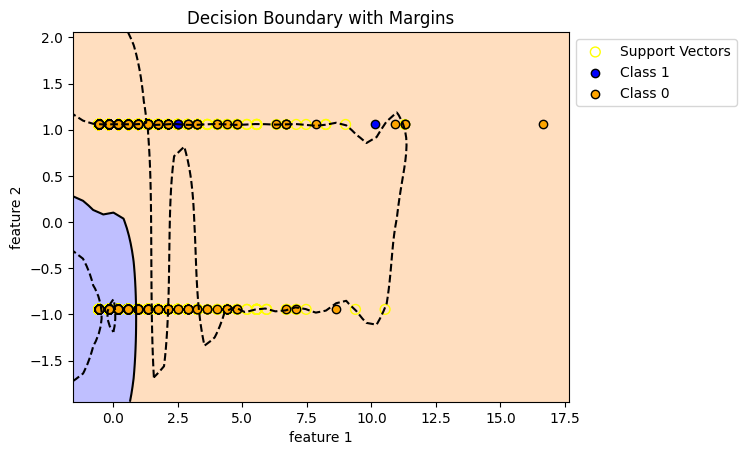

In [38]:
plot_decision_boundary(model_svm3, X_test_least, y_test_least, True)

## 3. Decision Tree Task

#### Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

In [39]:
df = pd.read_csv("C:/Users/erdnc/Desktop/weights_bmi_6classes_updated.csv", encoding="utf-8")

#### Define features and target variable, you will use all features of dataset in this task

In [40]:
X_dt = df.drop(columns=["BMI_CLASS"]).to_numpy()
y_dt = df["BMI_CLASS"].to_numpy()

#### Split the dataset into a training set and a validation set (80% training and 20% validation).

In [41]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 47)

#### Initialize the Decision Tree classifier

In [42]:
model_dt = DecisionTreeClassifier(random_state = 47)

#### Train the Decision Tree classifier

In [43]:
model_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=47)

#### Make predictions on the validation set

In [44]:
predictions_dt = model_dt.predict(X_test_dt)

#### Evaluate the model's performance, print classification report and confusion matrix

In [45]:
print(f"Model's Performance: {accuracy_score(y_test_dt, predictions_dt) * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test_dt, predictions_dt))

print("Confusion Matrix:\n", confusion_matrix(y_test_dt, predictions_dt))

Model's Performance: 72.77%

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.62      0.55       119
           2       0.82      0.88      0.85       108
           3       0.75      0.80      0.77       106
           4       0.84      0.70      0.77       107
           5       0.85      0.67      0.75       132
           6       0.73      0.72      0.73       100

    accuracy                           0.73       672
   macro avg       0.75      0.73      0.73       672
weighted avg       0.75      0.73      0.73       672

Confusion Matrix:
 [[74 14 20 11  0  0]
 [10 95  3  0  0  0]
 [19  1 85  1  0  0]
 [25  1  5 75  1  0]
 [13  4  1  0 88 26]
 [10  1  0  2 15 72]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.

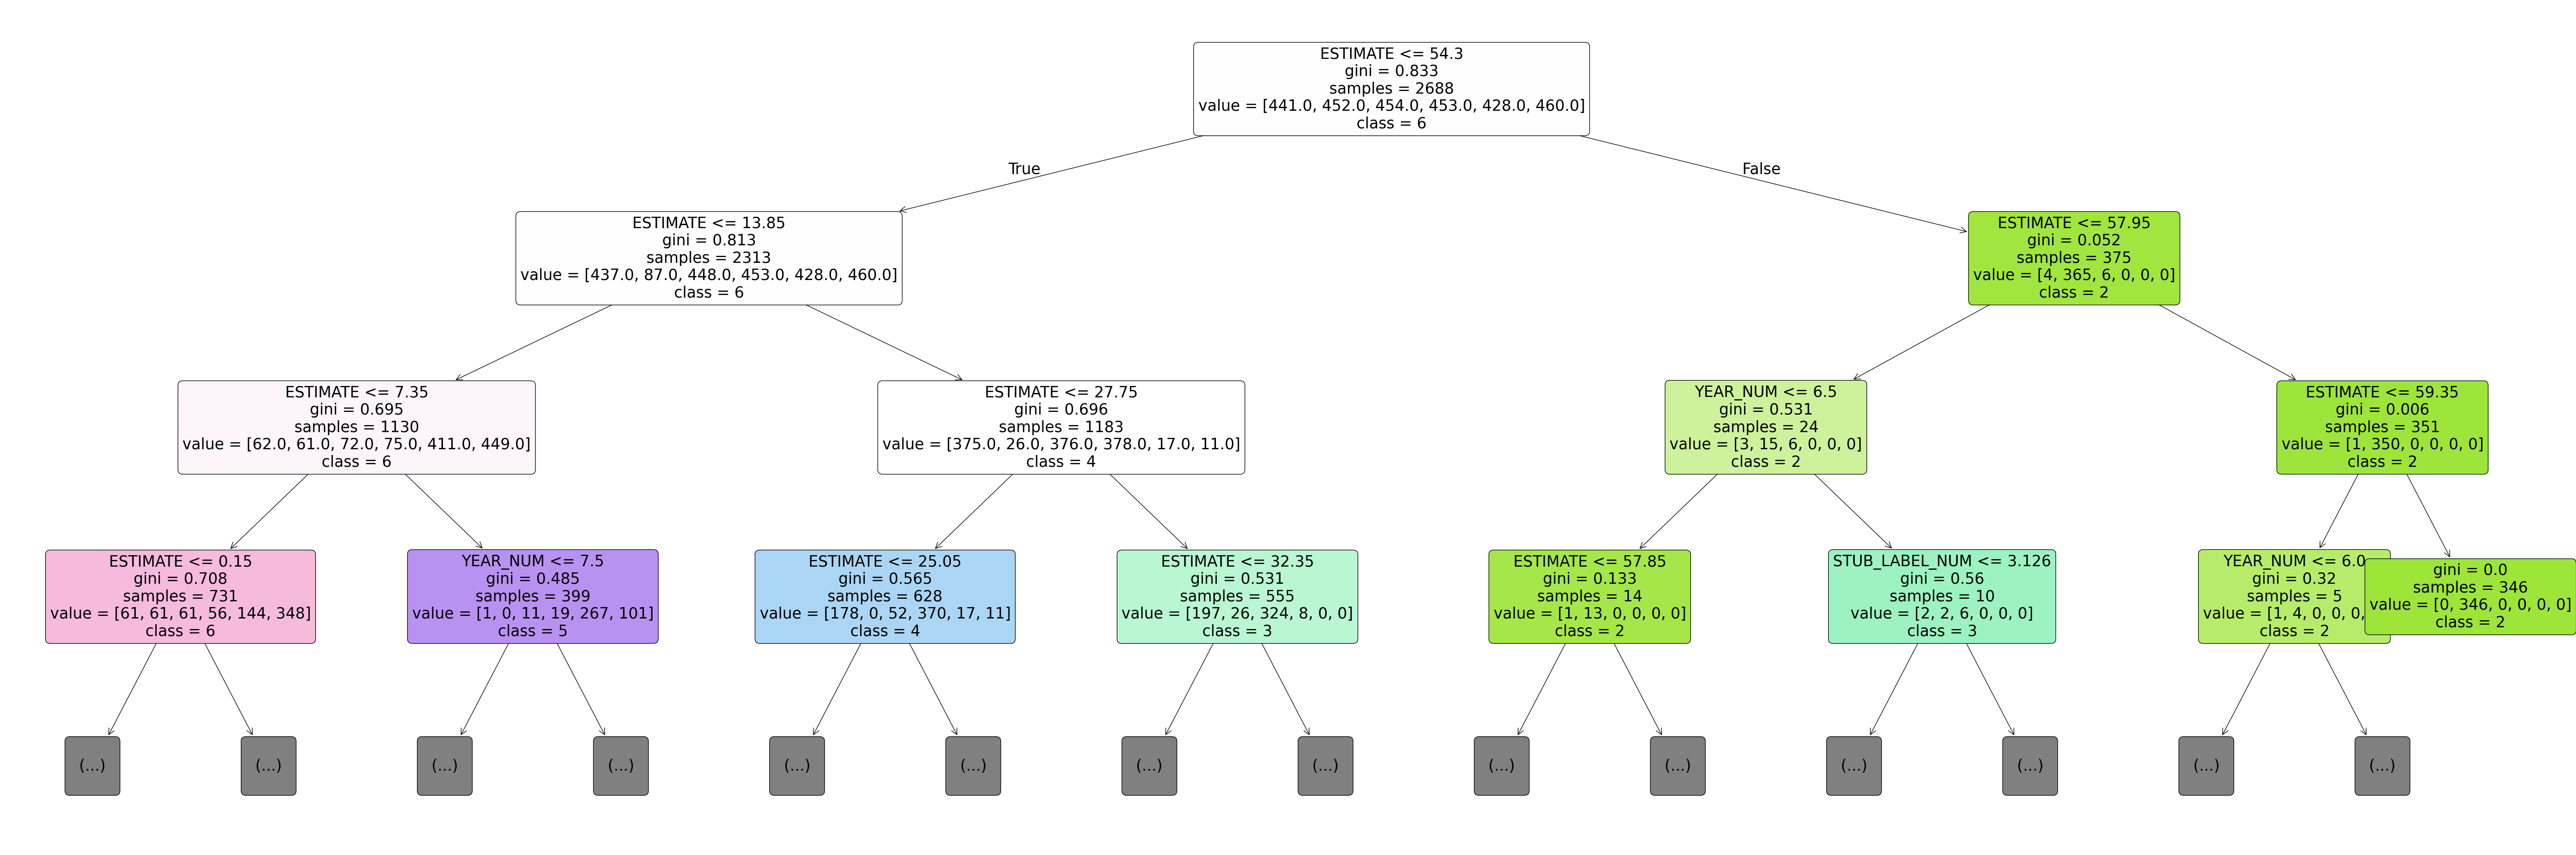

In [46]:
plt.figure(figsize=(75, 25))
plot_tree(
    model_dt,
    max_depth = 3,
    feature_names = df.drop(columns=["BMI_CLASS"]).columns,
    class_names = [str(c) for c in np.unique(y_test_dt)],
    filled = True,
    rounded = True,
    impurity = True,
    proportion = False,
    fontsize = 25
)
plt.show()

#### Explain briefly the question. What is the role of gini in decision tree?

The Gini, used in decision trees, is a metric for evaluating node splits and determines how homogeneous the data samples in a node are. The role of the Gini index is to assist the decision tree algorithm in selecting the best split during the branching process. A low Gini value indicates that the data samples in the node are more homogeneous, thus leading to a better split. The Gini index is frequently preferred due to its computational efficiency and effectiveness in practice. Therefore, it is a crucial criterion in decision tree algorithms for increasing class homogeneity and optimizing the model.